In [1]:
import numpy as np
import pandas as pd
import joblib
from crabnet.crabnet_ import CrabNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from matplotlib import pyplot as plt

/homes/kaiyuana001/.conda/envs/crabnet/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel('estm.xlsx')
df

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,27766.0,0.6300,0.000336,0.159985,10.1002/adfm.201806558
1,BiSb(Se0.92Br0.08)3,400.0,-138.00,23883.0,0.5700,0.000455,0.319177,10.1002/adfm.201806558
2,BiSb(Se0.92Br0.08)3,500.0,-163.00,20850.0,0.5300,0.000554,0.522607,10.1002/adfm.201806558
3,BiSb(Se0.92Br0.08)3,600.0,-181.00,19000.0,0.5100,0.000622,0.732305,10.1002/adfm.201806558
4,BiSb(Se0.92Br0.08)3,700.0,-193.00,17925.0,0.5000,0.000668,0.940000,10.1002/adfm.201806558
...,...,...,...,...,...,...,...,...
5200,Ge9Sb2Te12,423.0,77.28,173636.0,2.8586,0.001037,0.153448,https://doi.org/10.1021/acsami.0c02155
5201,Ge9Sb2Te12,525.0,97.50,136364.0,2.7576,0.001296,0.246795,https://doi.org/10.1021/acsami.0c02155
5202,Ge9Sb2Te12,625.0,112.88,120000.0,2.8232,0.001529,0.338496,https://doi.org/10.1021/acsami.0c02155
5203,Ge9Sb2Te12,725.0,135.19,108182.0,2.5354,0.001977,0.565374,https://doi.org/10.1021/acsami.0c02155


In [3]:
df1 = df[df['temperature(K)']<350]
df1 = df1[df1['temperature(K)']>100]
df1

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,27766.0,0.6300,0.000336,0.159985,10.1002/adfm.201806558
6,BiSb(Se0.94Br0.06)3,300.0,-112.00,26117.0,0.6400,0.000328,0.153568,10.1002/adfm.201806558
12,BiSb(Se0.96Br0.04)3,300.0,-100.00,21000.0,0.6500,0.000210,0.120000,10.1002/adfm.201806558
18,BiSb(Se0.98Br0.02)3,300.0,-109.00,21915.0,0.6800,0.000260,0.120000,10.1002/adfm.201806558
24,Cu2.025Cd0.975SnSe4,300.0,173.00,5362.0,2.6730,0.000160,0.018011,10.1002/adma.200900409
...,...,...,...,...,...,...,...,...
5175,(Sn0.985In0.015Te)0.9(AgCl)0.1,323.0,57.37,464045.0,3.8889,0.001527,0.126854,https://doi.org/10.1021/acsami.0c09781
5181,(Sn0.985In0.015Te)0.85(AgCl)0.15,323.0,58.53,420225.0,4.0000,0.001440,0.116247,https://doi.org/10.1021/acsami.0c09781
5187,Cu2SnSe3,323.0,89.29,13265.0,2.8264,0.000106,0.012086,https://doi.org/10.1021/acsami.0c04298
5193,Cu2Sn0.95Fe0.05Se3,323.0,55.48,115306.0,3.4280,0.000355,0.033442,https://doi.org/10.1021/acsami.0c04298


In [4]:
df1['electrical_conductivity(S/m)'] = np.log(df1['electrical_conductivity(S/m)'])
df1

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,10.231568,0.6300,0.000336,0.159985,10.1002/adfm.201806558
6,BiSb(Se0.94Br0.06)3,300.0,-112.00,10.170342,0.6400,0.000328,0.153568,10.1002/adfm.201806558
12,BiSb(Se0.96Br0.04)3,300.0,-100.00,9.952278,0.6500,0.000210,0.120000,10.1002/adfm.201806558
18,BiSb(Se0.98Br0.02)3,300.0,-109.00,9.994927,0.6800,0.000260,0.120000,10.1002/adfm.201806558
24,Cu2.025Cd0.975SnSe4,300.0,173.00,8.587092,2.6730,0.000160,0.018011,10.1002/adma.200900409
...,...,...,...,...,...,...,...,...
5175,(Sn0.985In0.015Te)0.9(AgCl)0.1,323.0,57.37,13.047737,3.8889,0.001527,0.126854,https://doi.org/10.1021/acsami.0c09781
5181,(Sn0.985In0.015Te)0.85(AgCl)0.15,323.0,58.53,12.948546,4.0000,0.001440,0.116247,https://doi.org/10.1021/acsami.0c09781
5187,Cu2SnSe3,323.0,89.29,9.492884,2.8264,0.000106,0.012086,https://doi.org/10.1021/acsami.0c04298
5193,Cu2Sn0.95Fe0.05Se3,323.0,55.48,11.655345,3.4280,0.000355,0.033442,https://doi.org/10.1021/acsami.0c04298


In [5]:
df1 = df1.sample(frac=1)
 
df_train = df1[:600].copy()
df_test = df1[600:].copy()



Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 49353.46formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 58785.28formulae/s]


loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler
Epoch: 0/300 --- train mae: 151 val mae: 136


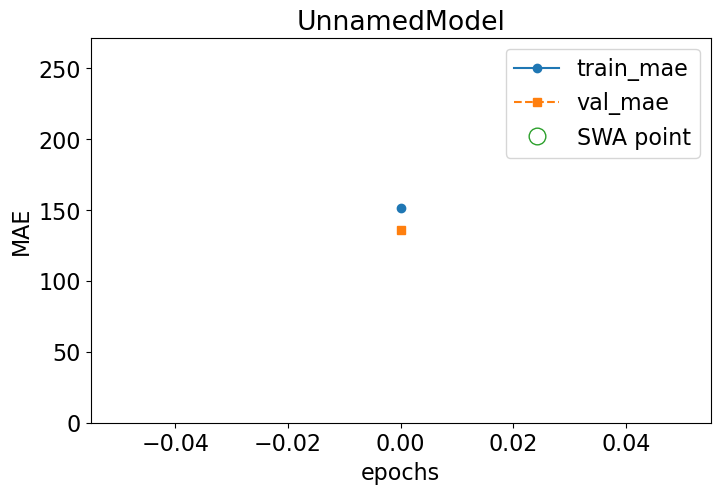

Epoch: 19/300 --- train mae: 87.5 val mae: 104


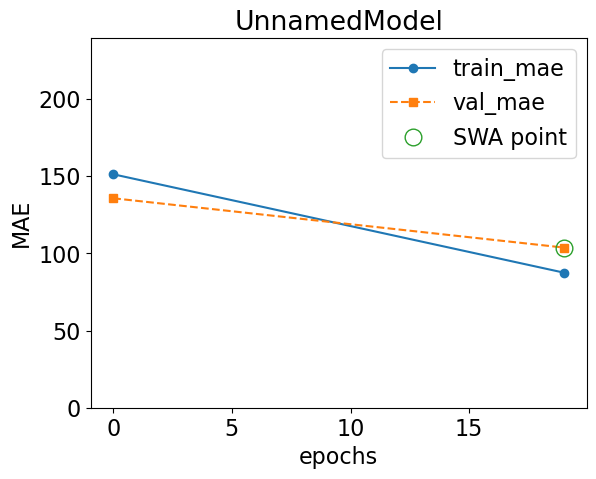

Epoch: 39/300 --- train mae: 52.7 val mae: 75.8


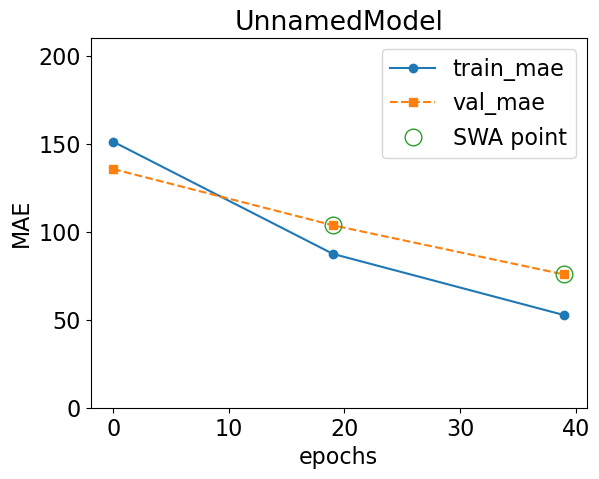

Epoch: 59/300 --- train mae: 32.8 val mae: 60.2


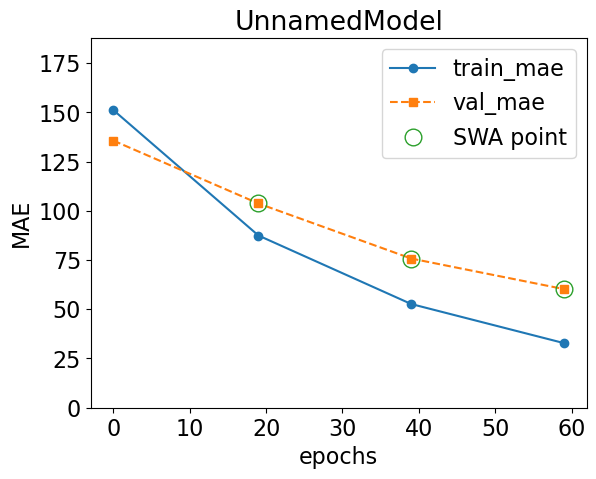

Epoch: 79/300 --- train mae: 22.4 val mae: 55.6


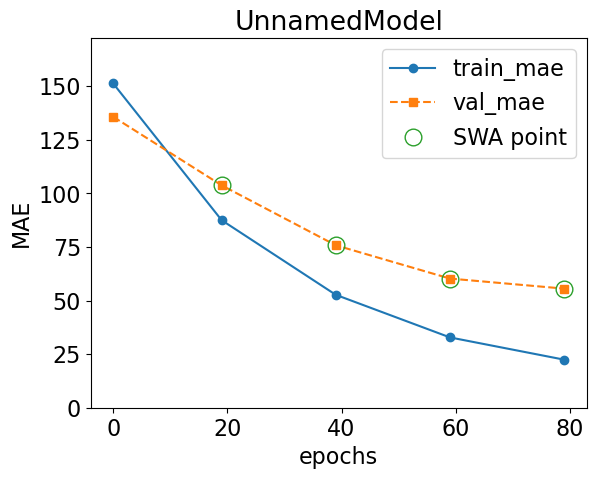

Epoch: 99/300 --- train mae: 17.2 val mae: 53.7


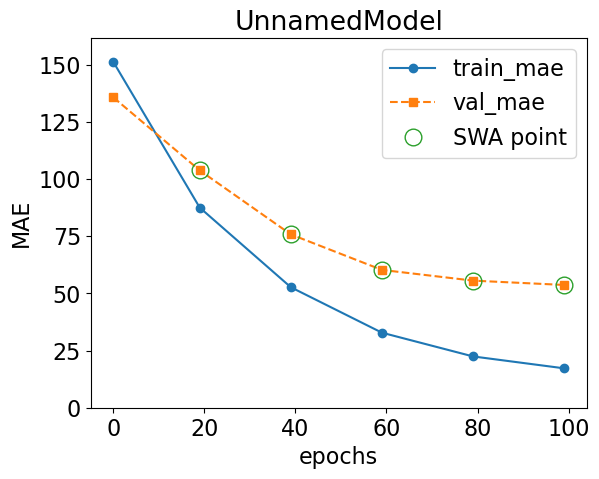

Epoch 119 failed to improve.
Discarded: 1/3 weight updates
Epoch: 119/300 --- train mae: 13.8 val mae: 56.2


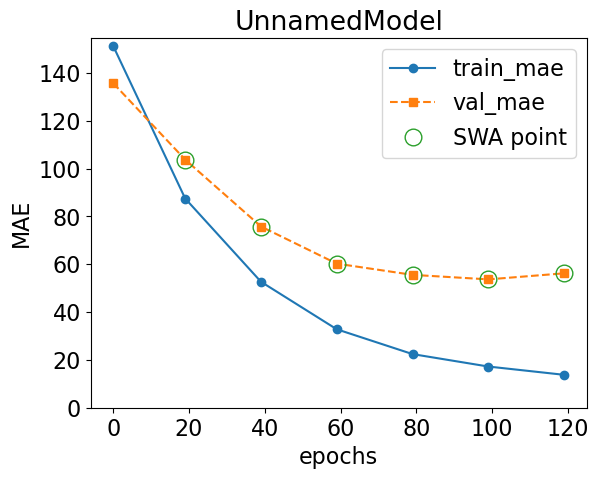

Epoch 139 failed to improve.
Discarded: 2/3 weight updates
Epoch: 139/300 --- train mae: 12 val mae: 54.4


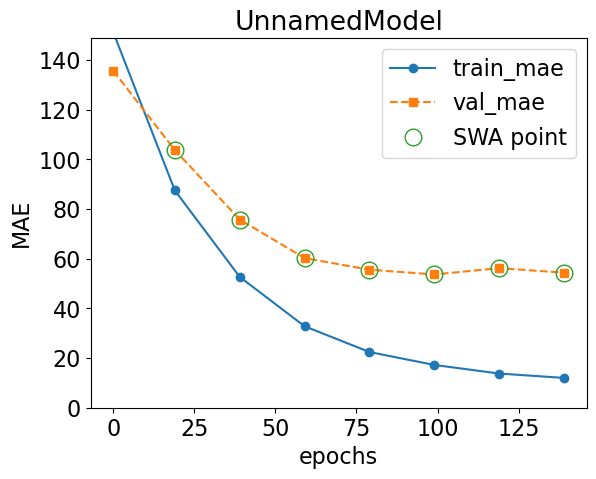

Epoch 159 failed to improve.
Discarded: 3/3 weight updates
Epoch: 159/300 --- train mae: 10.7 val mae: 54.5


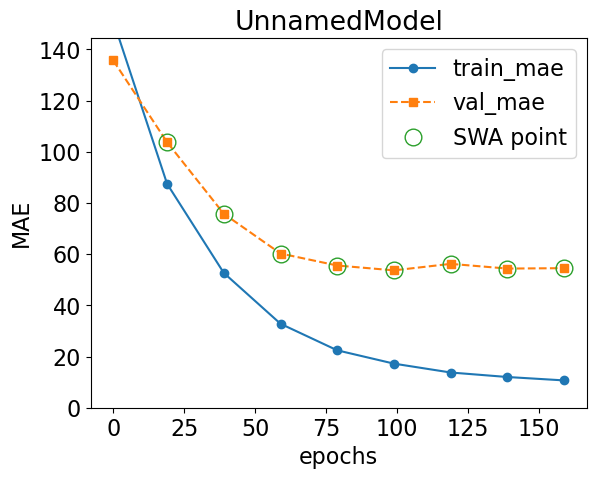

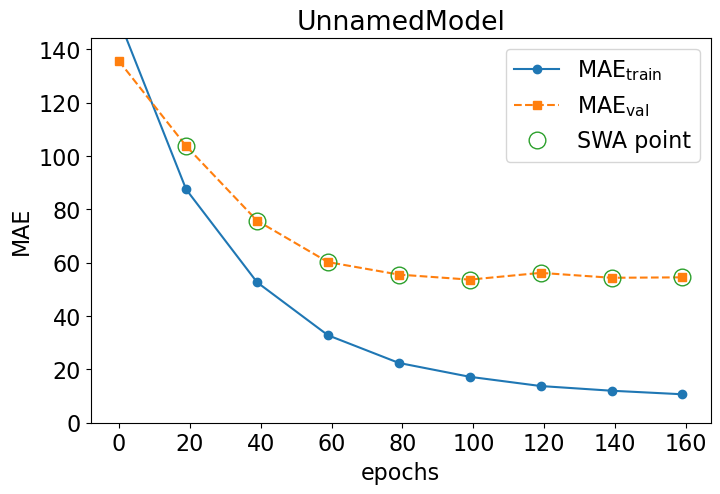

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 86349.93formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 86496.28formulae/s]

loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 2.05 val mae: 2.03


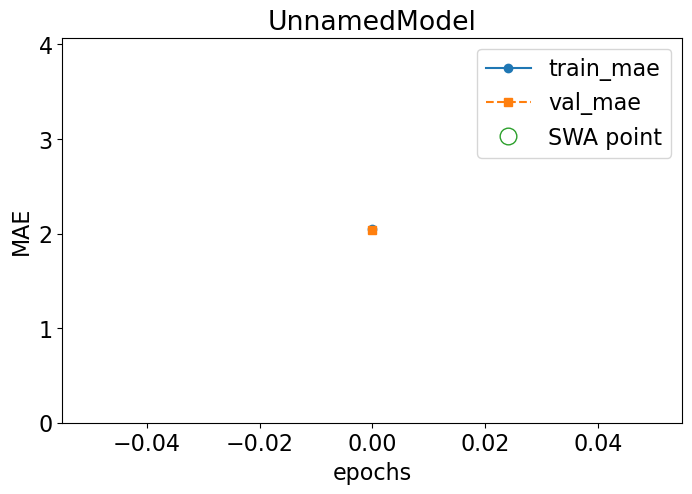

Epoch: 19/300 --- train mae: 1.06 val mae: 1.44


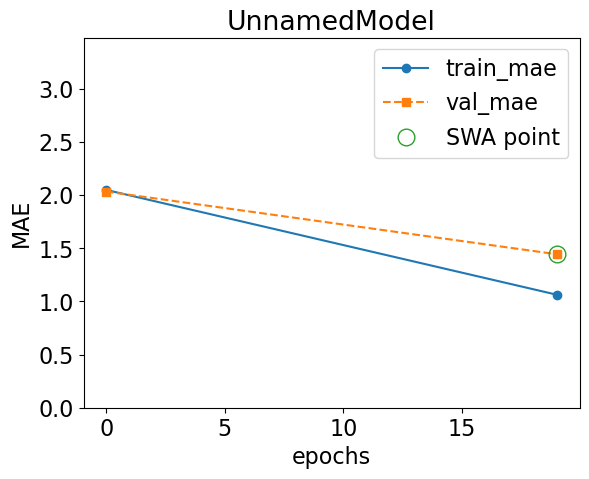

Epoch: 39/300 --- train mae: 0.612 val mae: 1.07


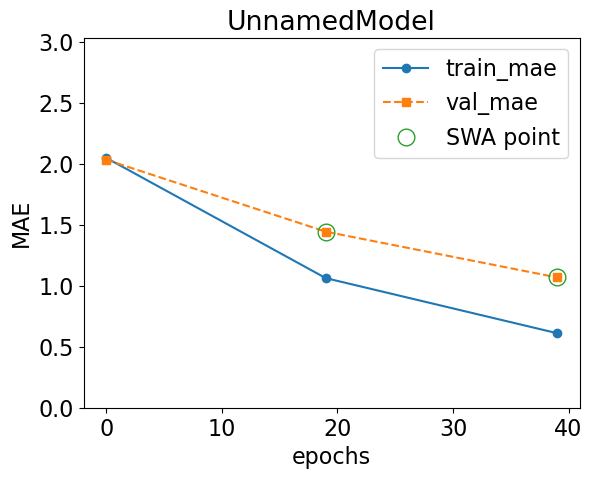

Epoch: 59/300 --- train mae: 0.407 val mae: 1


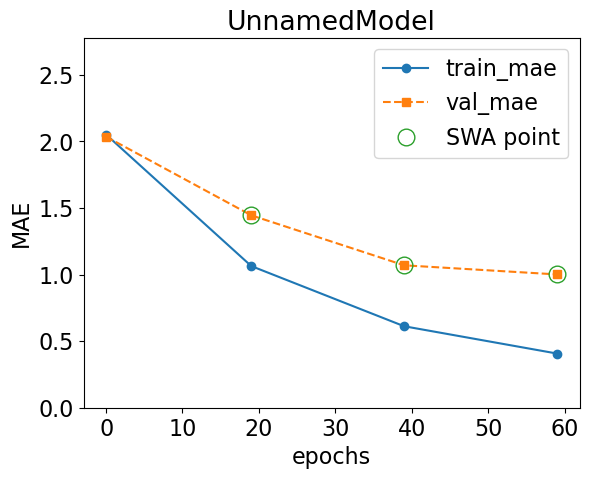

Epoch: 79/300 --- train mae: 0.322 val mae: 0.983


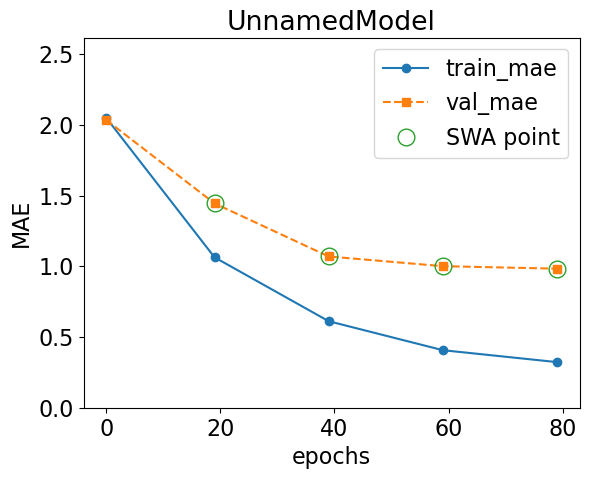

Epoch: 99/300 --- train mae: 0.263 val mae: 0.986


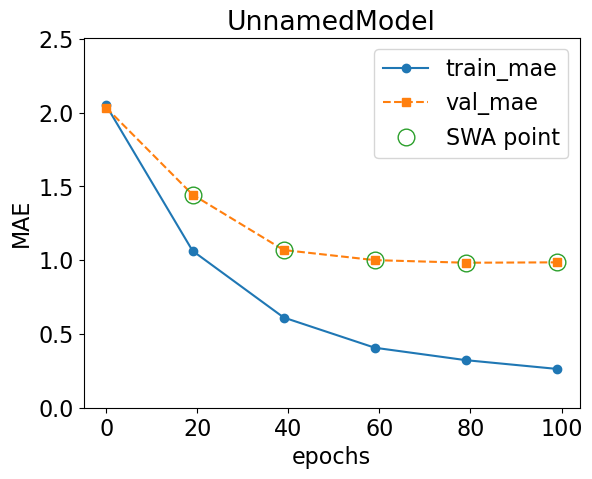

Epoch 119 failed to improve.
Discarded: 1/3 weight updates
Epoch: 119/300 --- train mae: 0.233 val mae: 0.978


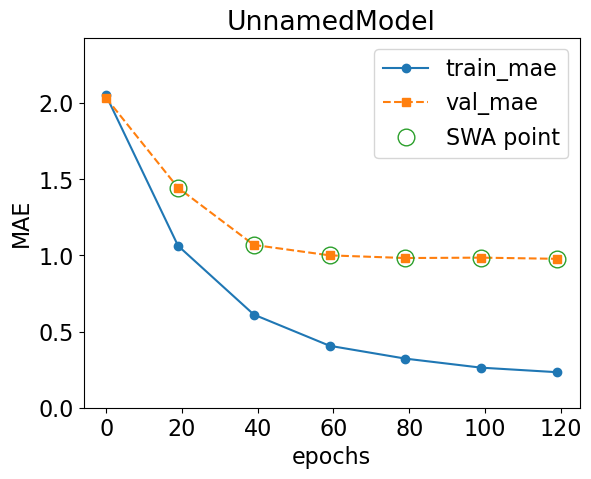

Epoch: 139/300 --- train mae: 0.211 val mae: 0.949


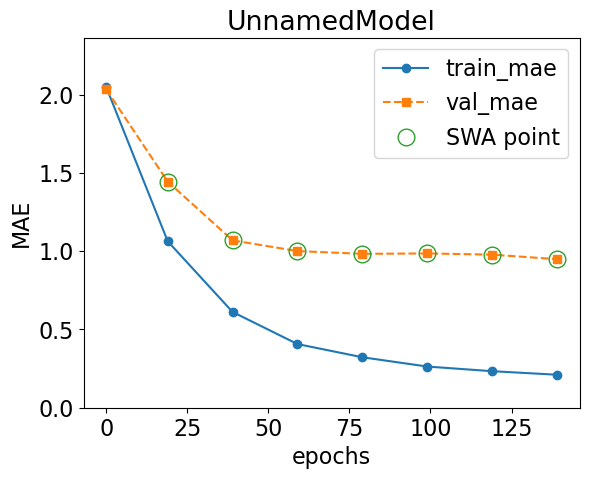

Epoch: 159/300 --- train mae: 0.203 val mae: 0.959


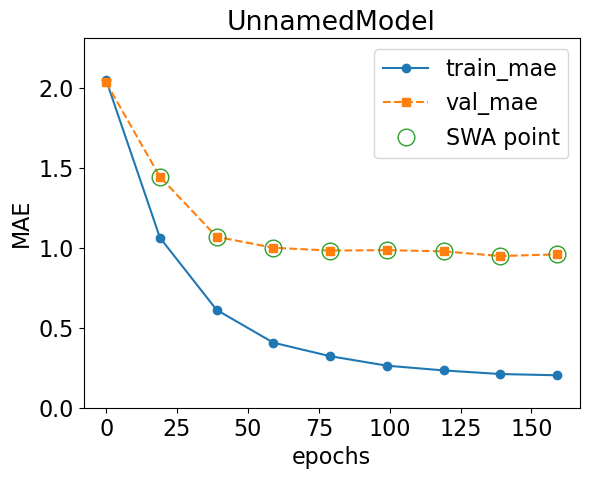

Epoch: 179/300 --- train mae: 0.188 val mae: 0.951


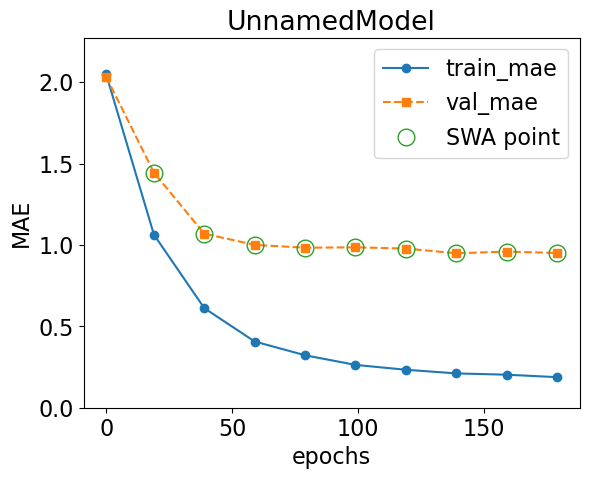

Epoch: 199/300 --- train mae: 0.184 val mae: 0.944


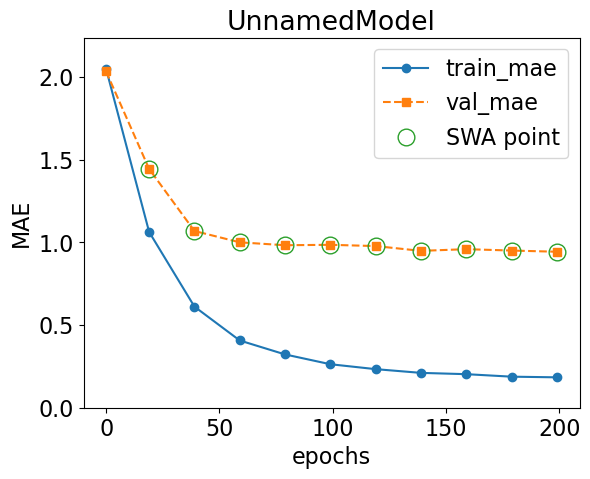

Epoch: 219/300 --- train mae: 0.179 val mae: 0.928


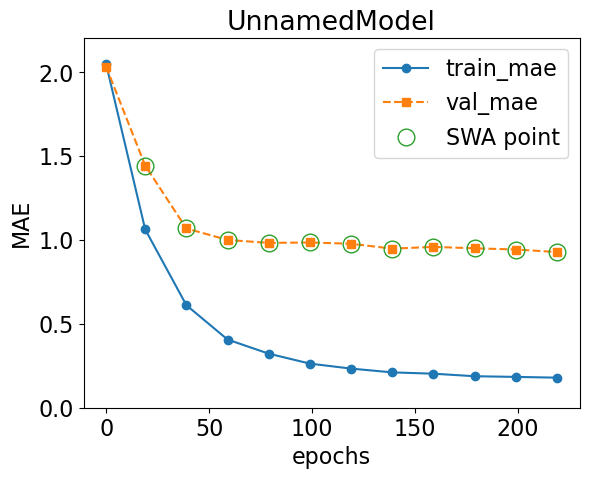

Epoch: 239/300 --- train mae: 0.177 val mae: 0.915


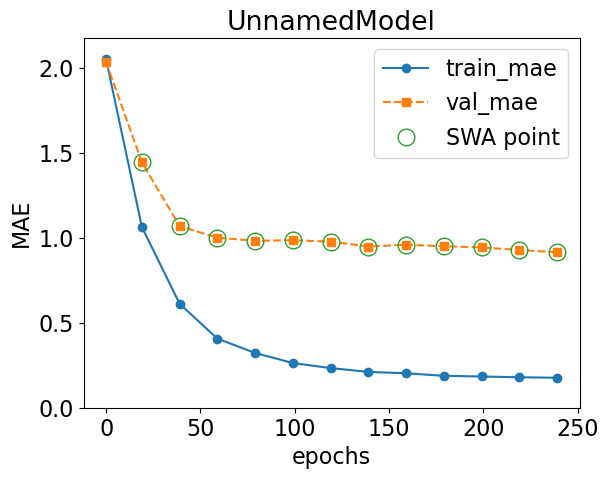

Epoch: 259/300 --- train mae: 0.174 val mae: 0.923


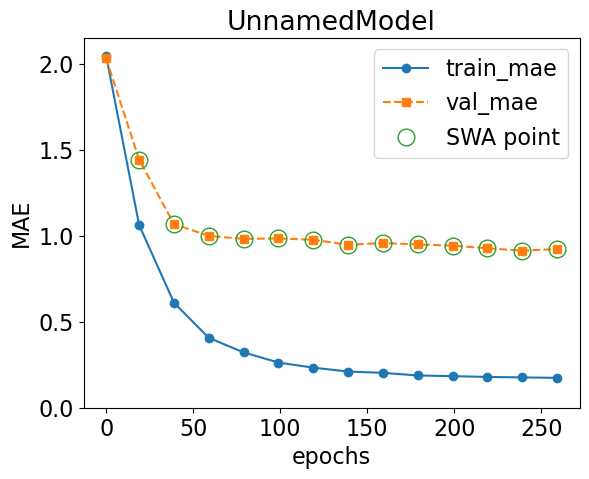

Epoch 279 failed to improve.
Discarded: 2/3 weight updates
Epoch: 279/300 --- train mae: 0.171 val mae: 0.929


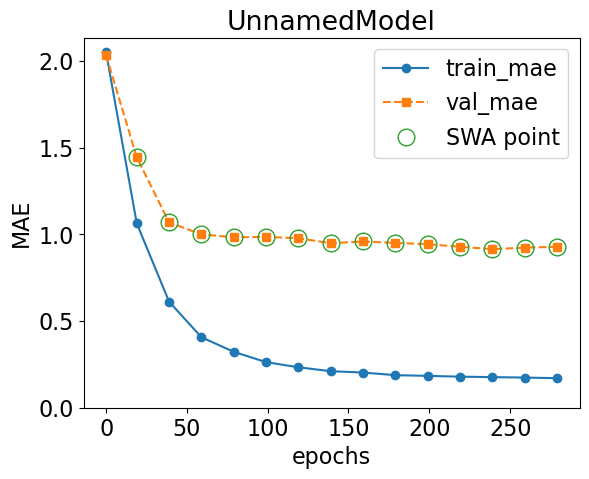

Epoch: 299/300 --- train mae: 0.165 val mae: 0.918


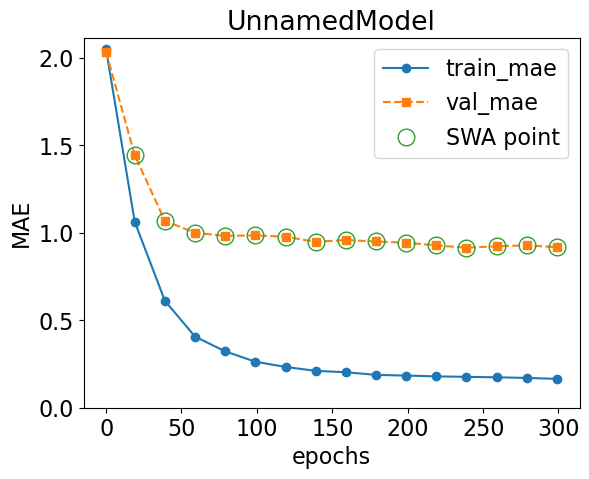

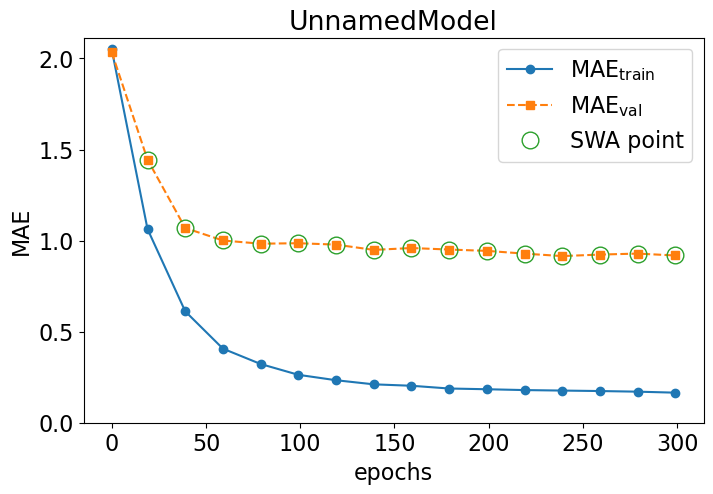

Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 86154.82formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 85970.68formulae/s]

loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 2.05 val mae: 2.35


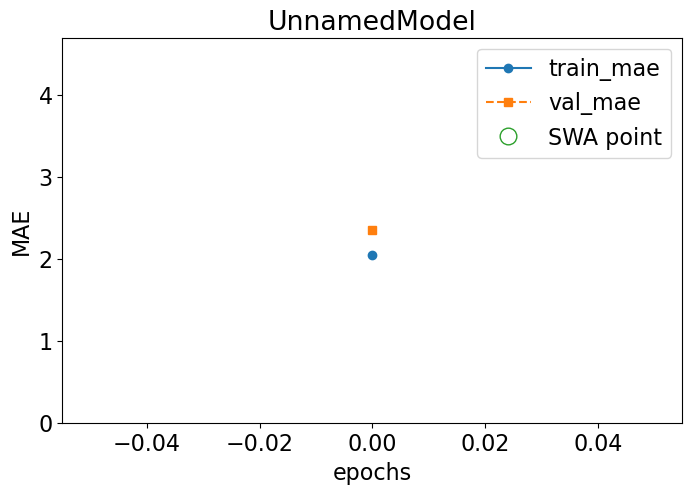

Epoch: 19/300 --- train mae: 0.885 val mae: 1.48


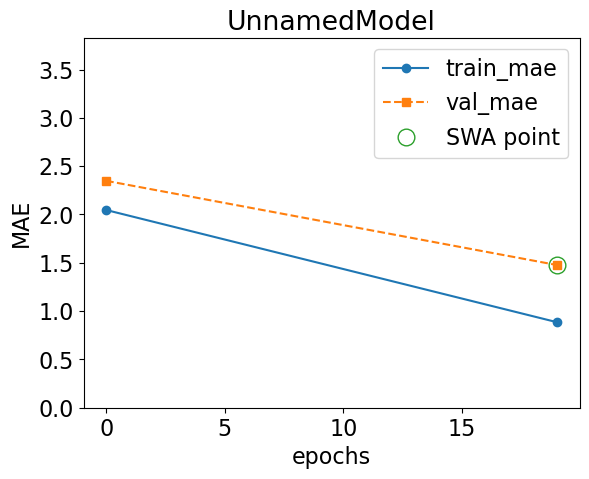

Epoch: 39/300 --- train mae: 0.55 val mae: 1.15


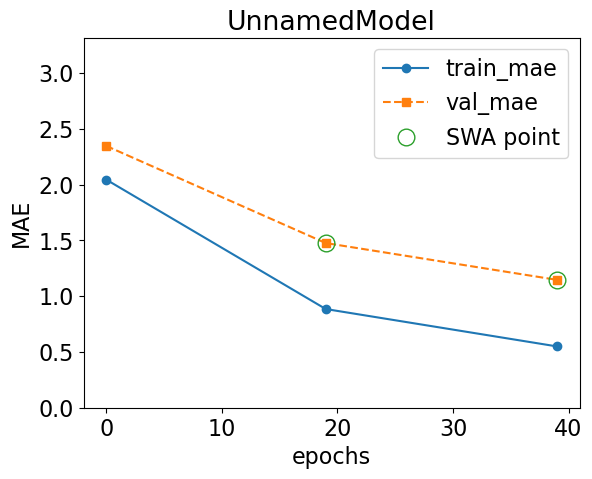

Epoch: 59/300 --- train mae: 0.45 val mae: 1.08


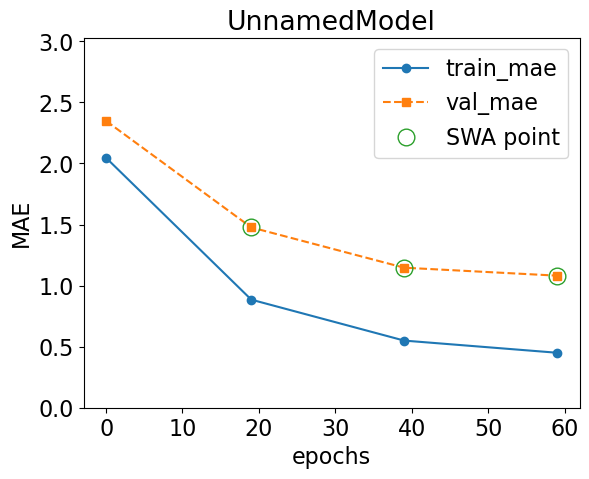

Epoch: 79/300 --- train mae: 0.35 val mae: 0.937


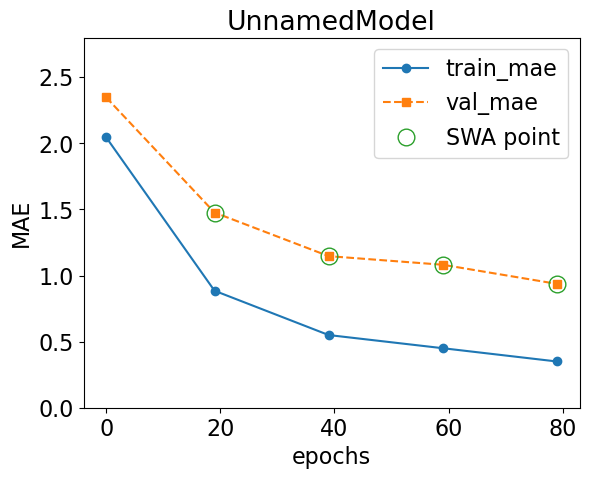

Epoch 99 failed to improve.
Discarded: 1/3 weight updates
Epoch: 99/300 --- train mae: 0.322 val mae: 0.954


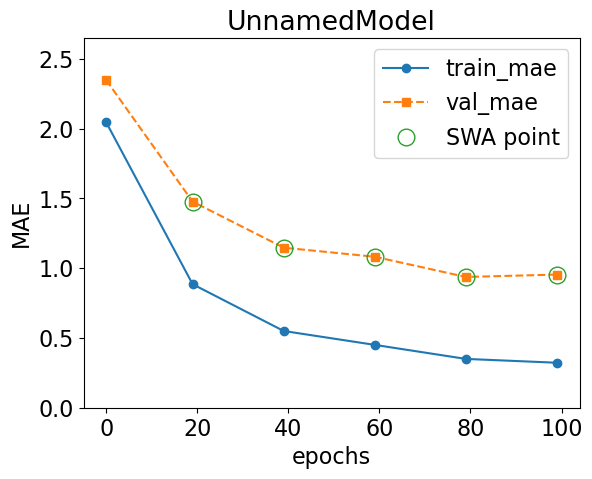

Epoch 119 failed to improve.
Discarded: 2/3 weight updates
Epoch: 119/300 --- train mae: 0.286 val mae: 0.954


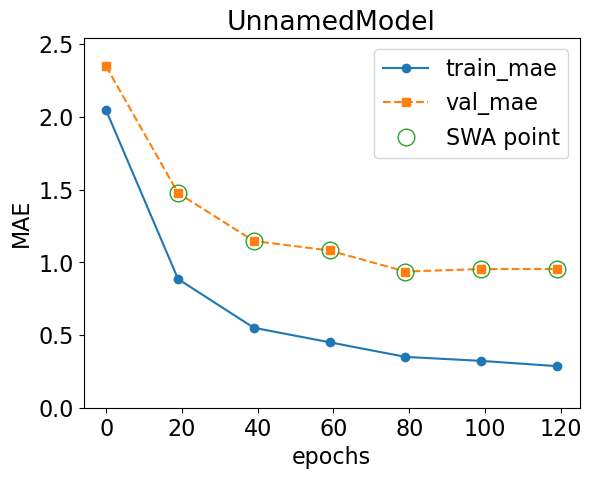

Epoch 139 failed to improve.
Discarded: 3/3 weight updates
Epoch: 139/300 --- train mae: 0.261 val mae: 0.974


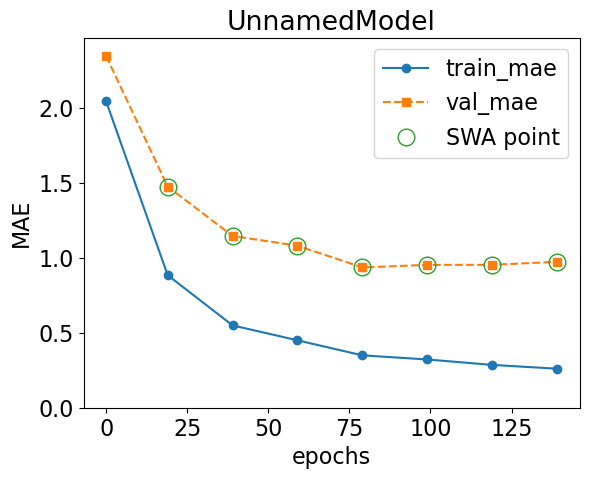

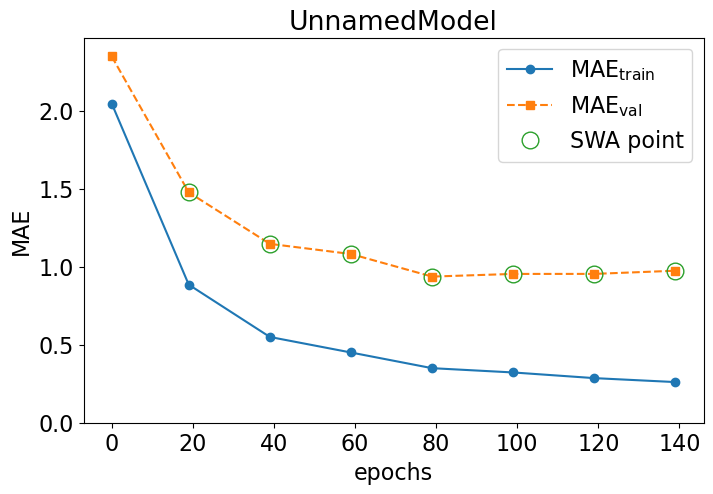

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


In [6]:
models = {}

for prop in df1.columns[2:5]:

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]
        
    cb = CrabNet(mat_prop="target",
                 d_model= 512,
                 heads=4,
                )
    cb.fit(train_df, test_df)
    models[prop] = cb

In [7]:
train_pred, train_sigma, test_pred, test_sigma = {}, {}, {}, {}

for prop in df1.columns[2:5]:

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]

    train_pred[prop], train_sigma[prop] = models[prop].predict(train_df, return_uncertainty=True)
    test_pred[prop], test_sigma[prop] = models[prop].predict(test_df, return_uncertainty=True)


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 86721.89formulae/s]

loading data with up to 6 elements in the formula



Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 84333.87formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 85621.34formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 84695.56formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 88341.43formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 84961.25formulae/s]

loading data with up to 6 elements in the formula


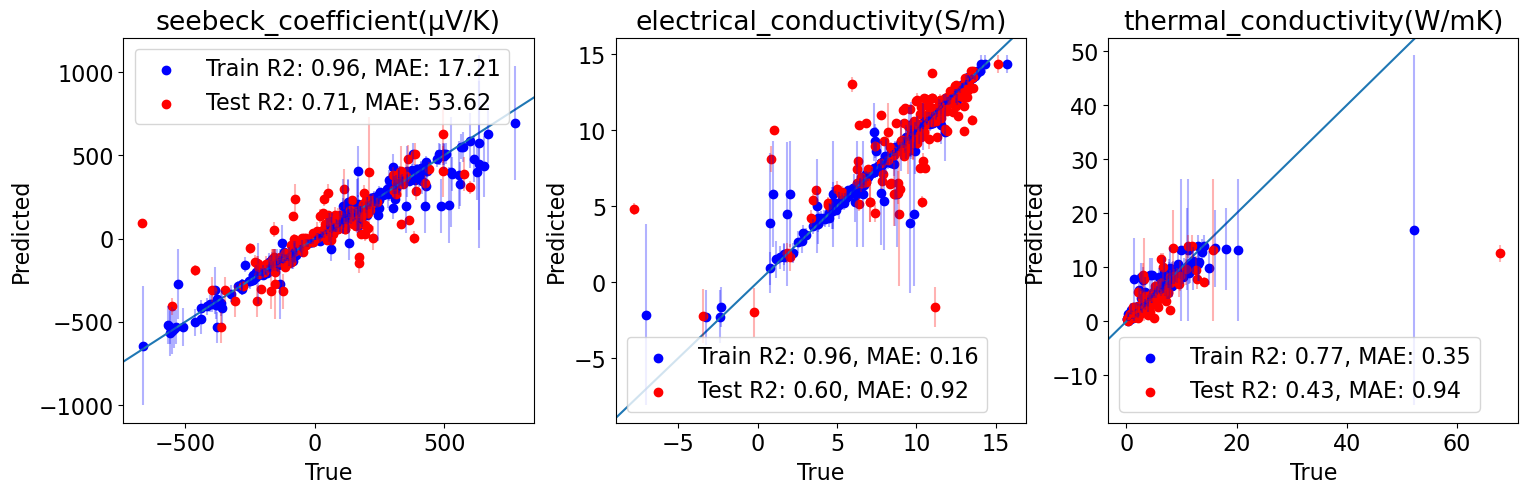

In [8]:
fig, ax = plt.subplots(ncols = 3, figsize = (18,5))

for i, prop in enumerate(df1.columns[2:5]):

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]


    r2_train = r2_score(train_df['target'].to_numpy(), train_pred[prop])
    mae_train = mean_absolute_error(train_df['target'].to_numpy(), train_pred[prop])
    
    r2_test = r2_score(test_df['target'].to_numpy(), test_pred[prop])
    mae_test  = mean_absolute_error(test_df['target'].to_numpy(), test_pred[prop])

    ax[i].axline((1, 1), slope=1)
    ax[i].scatter(x=train_df['target'].to_numpy().ravel(),
                y=train_pred[prop].ravel(), label=f'Train R2: {r2_train:.2f}, MAE: {mae_train:.2f}', c='b',
              )
    ax[i].errorbar(x=train_df['target'].to_numpy().ravel(),
                y=train_pred[prop].ravel(),
                yerr=train_sigma[prop].ravel(),
               ls='none', c='b', alpha=0.3,)
    
    
    ax[i].scatter(x=test_df['target'].to_numpy().ravel(),
                y=test_pred[prop].ravel(), label=f'Test R2: {r2_test:.2f}, MAE: {mae_test:.2f}', c='r',
              )
    ax[i].errorbar(x=test_df['target'].to_numpy().ravel(),
                y=test_pred[prop].ravel(),
                yerr=test_sigma[prop].ravel(),
               ls='none', c='r', alpha=0.3,)
    
    
    ax[i].set_title(f'{prop}')
    ax[i].set_xlabel('True')
    ax[i].set_ylabel('Predicted')
    ax[i].legend()